## Final Project Submission

* Student name: 
        Beatrice Kirui
        Cliff Shitote
        Winfred Muthoni
        Leornard Rotich
        Brian Kabugih
        
* Student pace: Full time
* Scheduled project review date/time: 
        21st April 2023
* Instructor name: 
        Nikita Njoroge
        Lucille Kaleha
        Samuel karu
* Blog post URL:
       https:/best_project_ever.com

# Introduction

## Project Overview



This project aims to leverage data science techniques to **predict the value of property** in North Western County.

## Business Problem

Homeowners are looking for ways not only to evaluate the prices of their homes, but also to keep track of it as it changes overtime. Real estate agencies are also looking for methods to evaluate property that will yield fair results and customer satisfaction. With the help of data, we can leverage data science techniques to provide **a trusted estimate of property all across the the North Western County**.

## Data

We'll be using the King County House Sales dataset.

The dataset contains:
1. Sale price
2. Condition
3. Grade
4. Number of bedrooms
5. Number of floors

## Let us import libraries and explore the dataset

### Importing Libraries

In [2]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from scipy.stats import norm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings(action= 'ignore', category= UserWarning)
import folium

#code to display all the columns without truncation
pd.set_option('display.max_columns', None)


# Data Understanding

Here are exploring our dataset by loading it and viewing various columns and rows in it. 

We then clean the dataset by: 
                             
* Obtaining information from the dataset.
                              
* Checking for missing values.
                             
* Checking for duplicates.
                               
* Checking for the outliers.
                              
* Checking for correct data types.
                              
* Changing some column names.
                              
                              
                              
                              

We defined functions to explore our data.

### Exploring the dataset

In [3]:
# Reading the dataset
df = pd.read_csv("data/kc_house_data.csv")

#Display the first few rows in the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Display the last few rows in the dataframe
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,Average,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
#Display of the number of rows and columns in the dataframe
def data_shape(df):
    """
    A function that returns the shape of a given DataFrame.

    The function prints the number of rows and columns in the DataFrame.
    """
    print(f"The DataFrame has:\n\t* {df.shape[0]} rows\n\t* {df.shape[1]} columns", '\n')
data_shape(df)    

The DataFrame has:
	* 21597 rows
	* 21 columns 



In [6]:
#Summary of the dataframe
def data_info(df):
    """
    A function that returns the shape of a given DataFrame.

    The function prints the number of rows and columns in the DataFrame.
    """
    print(df.info(), '\n')
data_info(df)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Checking the distribution of variables in the dataset

Checking the distribution of variables in the dataset involves examining how the different features that describe a house are distributed across the dataset.By looking at the distribution of features, we can identify any potential outliers, missing values, or unusual patterns that may need to be addressed during preprocessing. This information is crucial for building accurate machine learning models that can predict house prices.


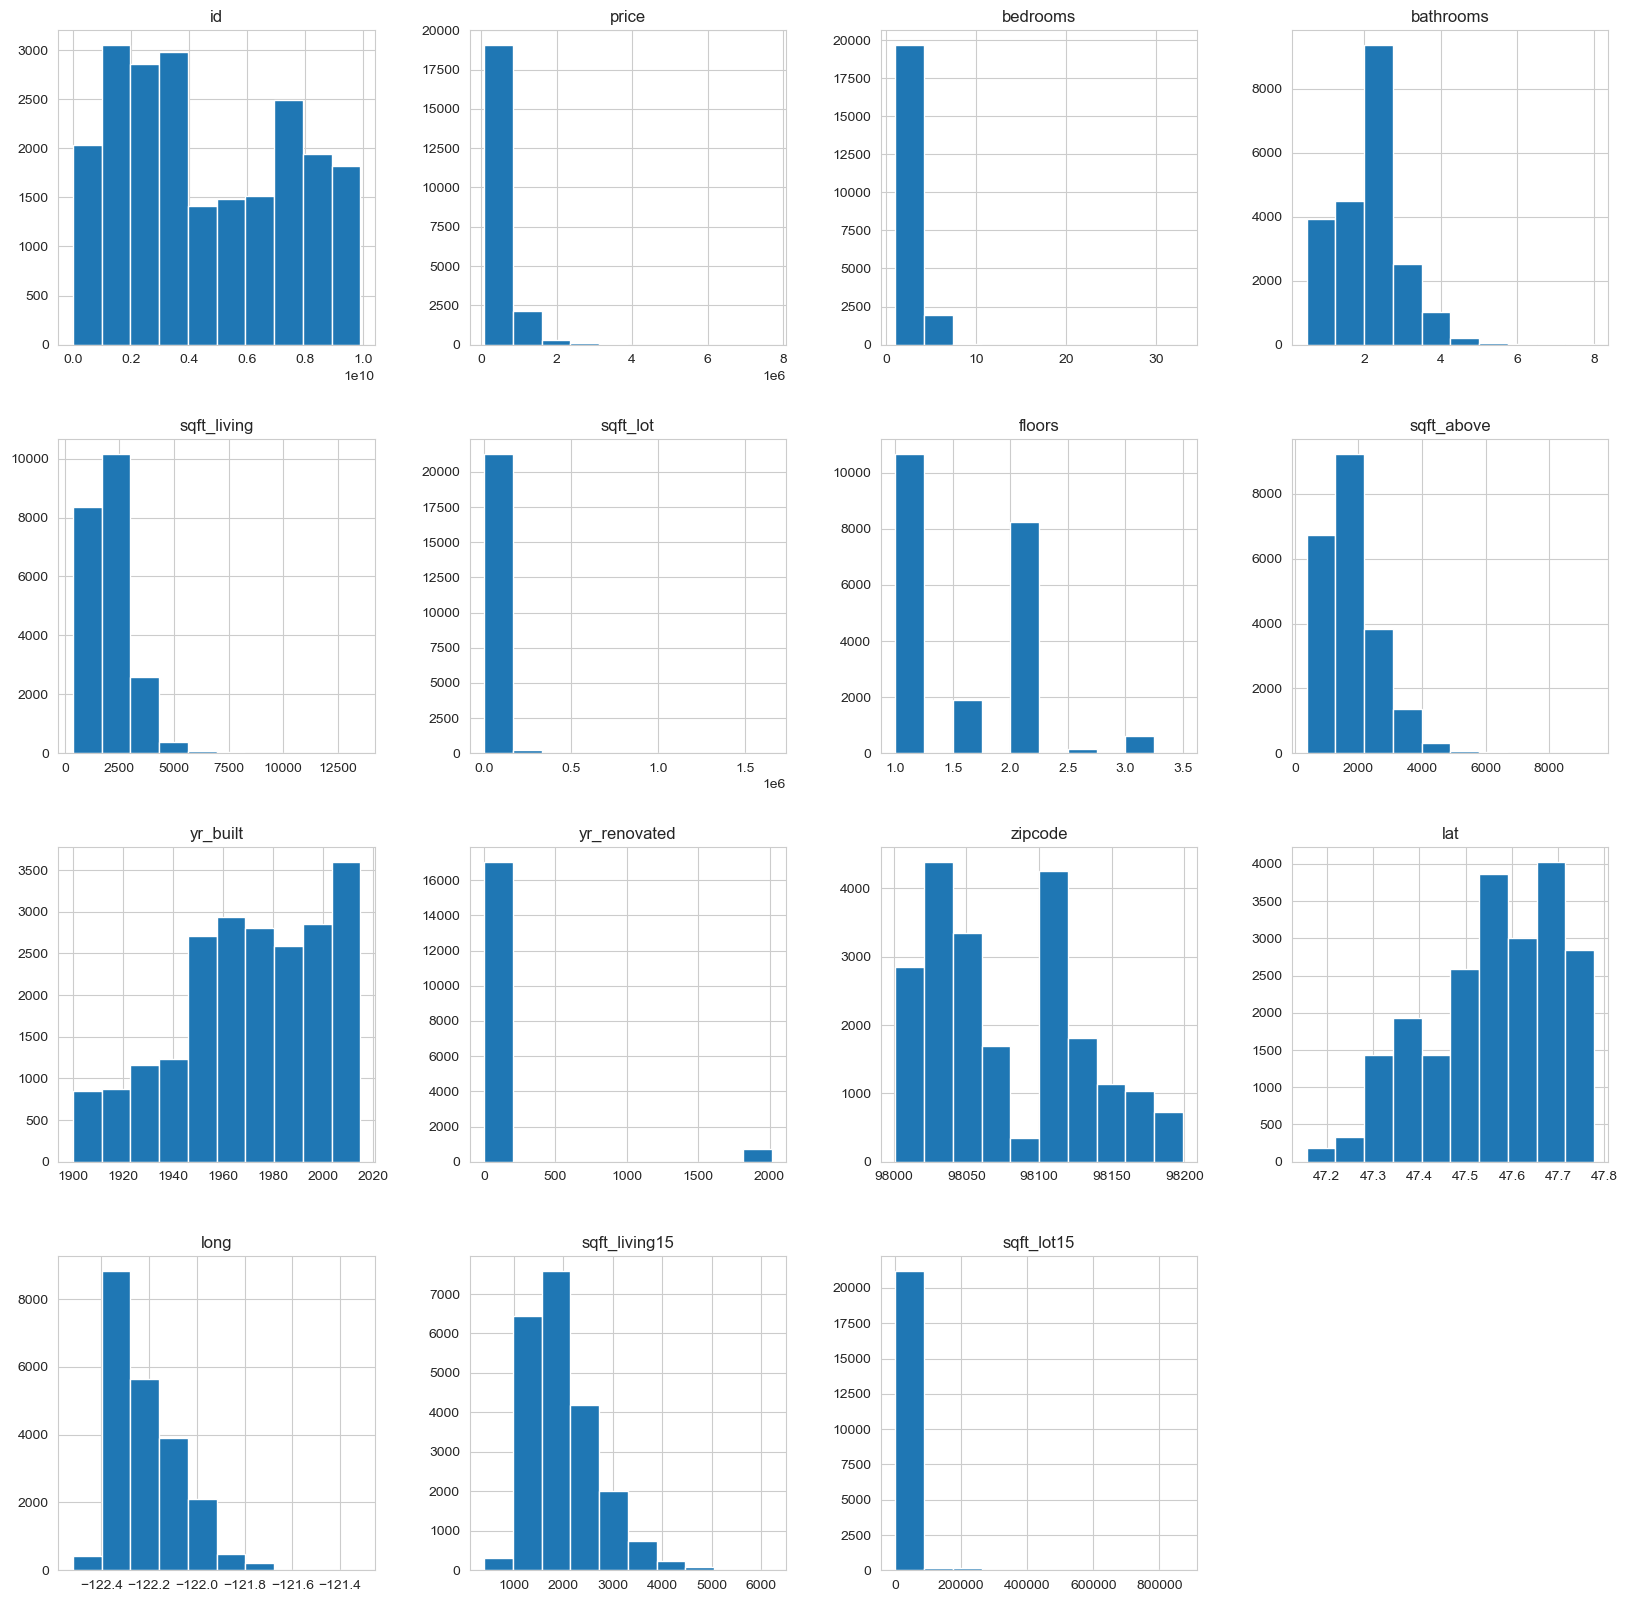

In [7]:
#plotting histograms
def histo(df):
    return df.hist(figsize=(20,20))
histo(df);


Most of the variables do not show normal distribution. As a result, some assumptions of regression analysis may not be met. Hence, we will have to do data transformation to normalize the data.This will create a more normal distribution.

### Here we check for the descriptive statistics of the dataset.

We first drop the ID column which is not necessary for descriptive statistics

In [8]:
#summary statistics of the numerical columns in a dataframe
def data_description(df):
    return (df.drop('id', axis = 1)).describe()
data_description(df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


As seen the data has:
    * 21597 rows which are the number of houses sold.
	* 21 columns which represent the house features.
    * The features are either strings ,floats or integers.

Our histogram shows  that our variables are not normally distributed which we will address by doin transformation on dataset.    

From our descriptive statitics we can see a potential for outliers such as the 33 bedrooms.

### What does each column in the Kings County Data Set represent?



    id - unique identifier for a house
    date - date the house was sold
    price - Sale price of the house (in dollars)
    bedrooms - number of Bedrooms in a house
    bathrooms - number of bathrooms in a house
    sqft_living - square footage of the house
    sqft_lot - square footage of the lot
    floors - total floors (levels) in the house
    waterfront - House which has a view to a waterfront
    view - number of people who viewed the house
    condition - How good the condition is ( Overall )
    grade - overall grade given to the housing unit, based on King County grading system
    sqft_above - square footage of house apart from basement
    sqft_basement - square footage of the basement
    yr_built - Year the house was built
    yr_renovated - Year the house was renovated
    zipcode - zip code in which the house is located
    lat - Latitude coordinate
    long - Longitude coordinate
    sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors



# Data Cleaning

## Renaming Columns

In [9]:
#Renaming date column to date_sold for easy interpretation
def renaming_columns(df,cols_old,cols_new):
    return df.rename(columns={cols_old: cols_new
    }, inplace=True)

renaming_columns(df,'date','date_sold')

## Checking for Missing Values

In [10]:
def identify_missing_values(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(df)

The Data has missing values.


In [11]:
#The following function returns all columns with missing values alongside the quantity and percentage

def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (round((data.isnull().sum() / len(data)*100),2)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})
    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(df)
missing_data

,Missing Values,Percentage(%)
yr_renovated,3842,17.79
waterfront,2376,11.00
view,63,0.29


There are missing values in 3 columns. Since yr_renovated and waterfront have too many missing values, it would be best to drop them. However, since 'view' has few values, we dropped only the rows that were affected

**Dropping "yr_renovated" column**

In [12]:
# Dropping columns
def drop_col(df,cols):
    df = df.drop(["yr_renovated"], axis=1)

**Dropping rows with missing values in "view" column**

In [13]:
# Dropping missing values 
def drop_miss_val(df,cols):
    return df.dropna(subset=[cols], inplace=True)
drop_miss_val(df,'view')

**Replacing missing values in "waterfront" column**

In [14]:
#Count of the unique values in the waterfront column
df.waterfront.value_counts(normalize=True)

NO     0.992434
YES    0.007566
Name: waterfront, dtype: float64

99.2% of homes are not considered as waterfront properties

In [15]:
#Replacing null values according to probability
def replace_missing_val(df,cols):
    df[cols] = df[cols].fillna(value=(np.random.choice(['YES', 'NO'], p=[0.01, 0.99])))
    print('There are', df[cols].isnull().sum(), 'missing values in waterfront column')
    
replace_missing_val(df,'waterfront')

There are 0 missing values in waterfront column


In [16]:
#Confirming if there are anymore missing values
df.isnull().sum()

id                  0
date_sold           0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Checking for duplicates

Many columns with categorical data will contain duplicates. However the 'id' column must only have a single unique identifier per entry. Lets verify this.

In [18]:
#finding total number of duplicates
# Duplicated entries
def identify_duplicates(df):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates
        duplicates_percentage = np.round(((no_true / len(df)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")
identify_duplicates(df)

The Data has no duplicates


In [37]:
# checking for duplicates in unique columns
def unique_column_duplicates(df, column):
    df.id.duplicated().sum()
    df = pd.DataFrame(df)
# count number of duplicated values in the 'id' column
num_duplicates = df['id'].duplicated().sum()
print('Number of duplicates in "id" column:', num_duplicates)

Number of duplicates in "id" column: 177


In [19]:
#Lets see the rows that have duplicates as per the id column
pd.concat( g for _,g in df.groupby("id") if len(g) > 1)

,id,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NO,NONE,Average,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,NO,NONE,Average,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,NO,NONE,Average,6 Low Average,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,NO,NONE,Average,6 Low Average,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,NO,NONE,Good,7 Average,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,9828200460,1/6/2015,430000.0,2,1.00,700,4800,1.0,NO,NONE,Average,7 Average,700,0.0,1922,0.0,98122,47.6147,-122.300,1440,4800
15185,9834200305,7/16/2014,350000.0,3,1.00,1790,3876,1.5,NO,NONE,Very Good,7 Average,1090,?,1904,0.0,98144,47.5750,-122.288,1360,4080
15186,9834200305,2/10/2015,615000.0,3,1.00,1790,3876,1.5,NO,NONE,Very Good,7 Average,1090,700.0,1904,0.0,98144,47.5750,-122.288,1360,4080
1084,9834200885,7/17/2014,360000.0,4,2.50,2080,4080,1.0,NO,NONE,Very Good,7 Average,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080


Here we notice that that there are duplicate ids which appear to be houses that were bought more than once by different clients

## Checking For correct data types

The column sqft_basement is an object as seen from data types

In [20]:
df.sqft_basement.value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
3480.0        1
1840.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 302, dtype: int64

In [21]:
# change ? in column to 0 - most commonly seen value
df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0')

## Checking for outliers

In [22]:
#summary statistics of the numerical columns in a dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,17704.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,1788.557537,1971.002275,83.765025,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,827.745641,29.376044,400.239690,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


That house with 33 bedrooms is definitely odd

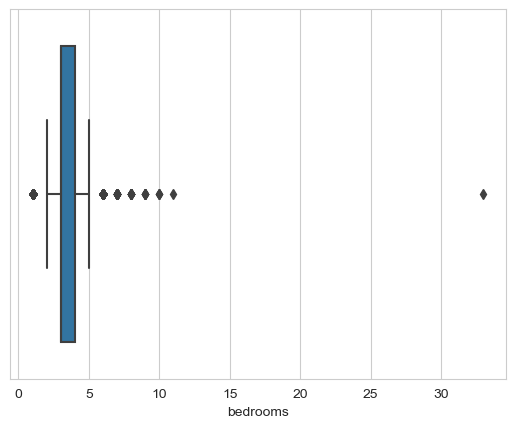

In [23]:
# we can also use a box plot to identify outliers
sns.boxplot(data=df, x="bedrooms");

In [24]:
#let's count the number of occurrences of each unique value in the 'bedrooms' column 
df['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [25]:
#Let's only show the row where the value in the 'bedrooms' column is equal to 33.
df[df['bedrooms'] == 33]

,id,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


### Dropping Outliers

In [26]:
# Let's drop the 33 bedroom row
df.drop(index=15856, inplace=True)

In [27]:
#Let's verify that it is gone
df['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [28]:
#Checking for outliers in bathrooms
df['bathrooms'].value_counts()

2.50    5364
1.00    3841
1.75    3034
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [29]:
df[df['bathrooms'] >= 7]

,id,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,NO,GOOD,Good,13 Mansion,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
8537,424049043,8/11/2014,450000.0,9,7.50,4050,6504,2.0,NO,NONE,Average,7 Average,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,NO,EXCELLENT,Average,13 Mansion,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
12764,1225069038,5/5/2014,2280000.0,7,8.00,13540,307752,3.0,NO,EXCELLENT,Average,12 Luxury,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


We shall not drop the bathrooms shown above

In [30]:
num_cols = df.select_dtypes(include=['float64','int64'])
num_cols.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [31]:
df.isnull().sum()

id                  0
date_sold           0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Our data is now clean

#  Exploratory Data Analysis

Lets look at data that would be interesting to first time home buyers by generating some questions that might conclude some interesting answers.

## How does price vary with the month sold?

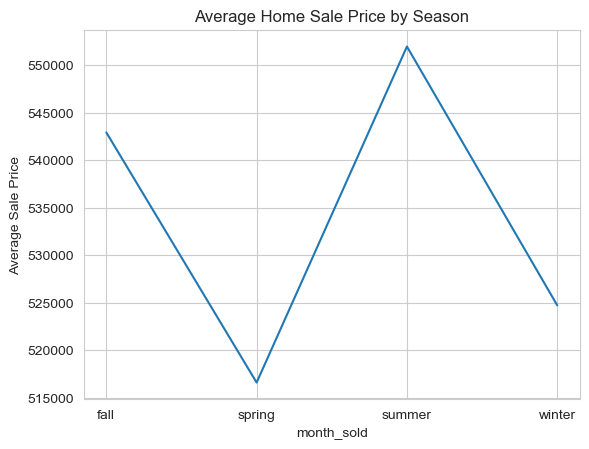

In [32]:
#Extracting an individual month column
df['month_sold'] = pd.DatetimeIndex(df['date_sold']).month

# set columns for seasons sold
df.loc[(df['month_sold'] >= 1) & (df['month_sold'] <= 3), 'season'] = 'spring'
df.loc[(df['month_sold'] >= 3) & (df['month_sold'] <= 6), 'season'] = 'summer'
df.loc[(df['month_sold'] >= 6) & (df['month_sold'] <= 9), 'season'] = 'fall'
df.loc[(df['month_sold'] >= 9) & (df['month_sold'] == 12), 'season'] = 'winter'
#Plotting a line graph
plt.plot(df.groupby('season')['price'].mean().round(2))
plt.title('Average Home Sale Price by Season')
plt.ylabel('Average Sale Price')
plt.xlabel('month_sold');

Here we see that prices start rising from spring to summer and start dropping during summer to spring

## Does the age of the house affect it's price

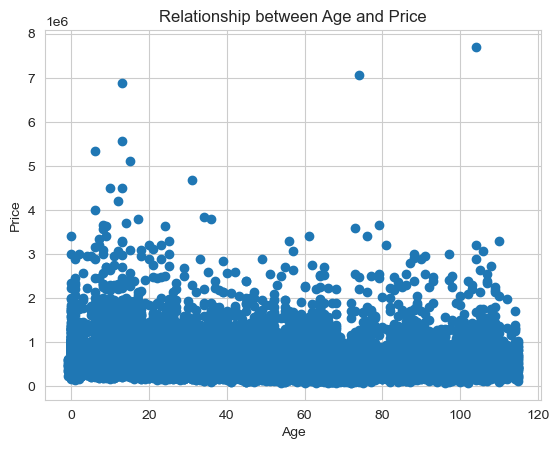

In [33]:
#Plotting a Scatter plot for age and price
year_sold = pd.DatetimeIndex(df['date_sold']).year
age =year_sold-df['yr_built']
df['age'] = age
plt.scatter(age, df['price'])
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Relationship between Age and Price');

There is a relationship between the age of the house and its price. Specifically, the analysis may have found that newer houses tend to be more expensive than older houses, all other things being equal. This could be because newer houses are typically in better condition and have more modern amenities than older houses.

## How does view affect price?

In [34]:
#Extracting value counts
df['view'].value_counts()

NONE         19421
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

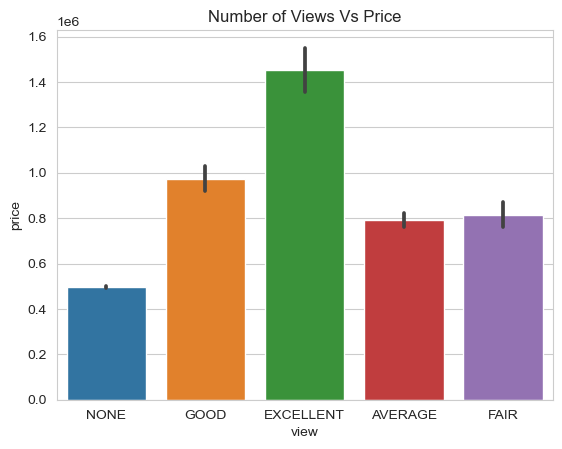

In [35]:
#Plotting a barplot of 'view' against 'price'
sns.barplot(x=df['view'], y=df['price']).set(title='Number of Views Vs Price');

It pays to advertise a house for this increases the number of views. For example the most expensive houses got the most number of views compared to the lowly priced houses.

In [36]:
# Group the data by zipcode and calculate the mean latitude and longitude
zipcode_data = kc_real_estate.groupby('zipcode').agg({'lat': 'mean', 'long': 'mean'}).reset_index()
# Create a map centered at the mean latitude and longitude of all the zipcodes
m = folium.Map(location=[kc_real_estate['lat'].mean(), kc_real_estate['long'].mean()], zoom_start=10)
# Add markers for each zipcode
for _, row in zipcode_data.iterrows():
    folium.Marker(location=[row['lat'], row['long']], popup=row['zipcode']).add_to(m)
# Display the map
m

NameError: name 'kc_real_estate' is not defined

# Which factors are most correlated with price?

In [ ]:
# Let's check for interactions between other features.
corr = df.corr()
corr

## Correlation Matrix

### Checking Correlations and Multicollinearity

In [ ]:
# Lets create a heatmap to check for correlations
fig, ax = plt.subplots(figsize=(15,8))
ax= sns.heatmap(df.corr(), annot=True, cmap="crest")
plt.title("Correlation between features",weight='bold',fontsize=18);

In [ ]:
plt.figure(figsize=(7,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(), cmap= 'coolwarm', mask= mask, linewidth= 1)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()


From the heat map, the most correlated factors with price are sqft_living, sqft_above, sqft_living15 and bathrooms.

### One-hot Encoding

We would also expect the condition of the house to affect its price. Let's verify this

In [ ]:
df['condition'].value_counts()

In [ ]:
# Create a scatter plot to show the relationship between the condition of house and the price
plt.scatter(df['condition'], df['price'], color='brown')
plt.title('Relationship between price and condition')
plt.xlabel('Condition rating')
plt.ylabel('Price')
plt.grid(color='purple',
         alpha=0.1,
         linestyle='-.',
         linewidth=2);

Surprisingly, houses with average conditions tend to be sold at higher prices as compared to the houses with very good conditions.

In [ ]:
sns.pairplot(data=df, x_vars=['sqft_lot','sqft_above','sqft_living','sqft_living15','sqft_lot15'], y_vars=["price"]);

We can see that sqft_lot size is not well correlated to price but the data for living space is reasonable. Visually the best feature to use looks like sqft_living as we expected because it has a stronger linear relationship with price.

In [ ]:
# Lets pull that data out of the data-frame into a new frame
data = df[["price", "sqft_living"]]
data.head()

# Multiple Linear Regression Assumptions

There are four assumptions that must be checked as part of the multiple linear regression analysis process:

1. No multicollinearity
2. Linear relationship between explanatory and response variables
3. Homoscedasticity of error terms
4. Normal distribution of model residuals

## Let's Start with a Simple Linear Regression Model

Since `sqft_living` is the feature with the strongest correlation, let's build a simple linear regression with that.

$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1} x $$

In [ ]:
# scatter plot sqft_living and price
df.plot.scatter(x="sqft_living", y="price");

In [ ]:
corr = df.corr()['price']
corr

In [ ]:
most_correlated = 'sqft_living'

In [ ]:
#Declaring Variables
y = df['price']
X_baseline = df['sqft_living']

#Fitting model
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

#Printing Results
print(baseline_results.summary())

Looking at the summary above, we can see that the regression line we found was
$$ \hat{price} = -42180 + 279.9379 sqft_living area $$
* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 50% of the variance in price
* The model coefficients (`const` and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
* If a house had 0 sqft_living, we would expect price to be about −42180
* For each increase of 1 sqft_living, we see an associated increase of about 279.9379

**Mean absolute error**

In [ ]:
#Calculating mean absolute error
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

## Multiple Linear Regression Model

In [ ]:
# Select the categorical features
categorical_features = ['waterfront', 'view', 'condition', 'grade']

# Create bar graphs for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    df.groupby(feature)['price'].mean().plot(kind='bar')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

In [ ]:
cat_col = 'grade'

In [ ]:
X_iterated = df[[most_correlated, cat_col]]
X_iterated 

### Preprocessing Categorical Variable

In [ ]:
# Use pd.get_dummies to one-hot encode the categorical column in X_iterated
X_iterated = pd.get_dummies(X_iterated, columns=[cat_col],drop_first=True)
X_iterated

In [ ]:
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()
print(iterated_results.summary())

Our new model is statistically significant overall, and explains about 58% of the
variance in price. This is about 9% more variance explained than the simple
model.

All the variables have a p_value of less than alpha = 0.05 except grade_3 Poor therefore they are statistically significant.

So, we have an improvement in terms of variance explained (R-Squared), but also
some values are not statistically significant.


In [ ]:
X_many = df[["sqft_living", "bedrooms", "view", "waterfront", "grade"]]
X_many = pd.get_dummies(X_many, columns=['view', 'waterfront', 'grade'], drop_first=True)

In [ ]:
final_model = sm.OLS(y, sm.add_constant(X_many))
final_results = final_model.fit()
print(final_results.summary())

In [ ]:
#Final mae
final_mae = mean_absolute_error(y, final_results.predict(sm.add_constant(X_many)))
baseline_mae, final_mae

In [ ]:
baseline_results.rsquared_adj, final_results.rsquared_adj

Overall the model performed marginally better. We were off by about 149171 rather than 173560 in a given prediction, and explained 62.9% rather than 49.2% of the
variance in price.

In [ ]:
results_df = pd.concat([final_results.params, final_results.pvalues], axis=1)
results_df.columns = ["coefficient", "p-value"]
results_df

The p_value is very small implying that the predictor variables are statistically significant.

## Plotting Residuals

This checks for the relationship between the predictor variable and the residuals

In [ ]:
#Scatter plot of residuals
fig, ax = plt.subplots()
ax.scatter(df["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

## Testing for Normality

## Using QQ-Plot to test for normality

In [ ]:
residuals = Model.resid
fig = sm.graphics.qqplot(residuals, dist=norm,line='r', fit=True)
fig.set_size_inches(10, 5)
fig.show()

Since almost all of the data points fall along a straight line in this QQ-plot, we can consider the normality assumption satisfied.

## Using A residual scatterplot to test for homoscedasticity

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=Model.predict(), y=Model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)
plt.show()

The scatterplot appears to show a roughly symmetrical and consistent spread of the residuals around the lowess regression line, suggesting that the homoscedasticity assumption is met for the Model.

## Computing RMSE

In [ ]:
y = df['price']
model = LinearRegression().fit(X_many, y)
y_pred = model.predict(X_many)

# Calculate RMSE
rmse = mean_squared_error(y, y_pred, squared=False)
print('RMSE:', rmse)

## Conclusion

The development of a model that accurately predicts house prices and identifies the key factors that influence those prices can provide significant benefits to a Real Estate Agency and their clients. By providing more accurate estimates of house prices and recommendations on how to improve property values, the agency can improve customer satisfaction, increase sales, and help homeowners make informed decisions about renovations or improvements. This project can provide valuable insights into the complex factors that influence the sale price of a house in King County, helping to inform decision-making and drive positive outcomes for all parties involved.



## Recommendations to First time home buyers
-First time home buyers should make sure they are buying houses between the months of October through March to avoid paying more for the same house the in spring and summer months.

-You can either search for properties independently or explore alternative methods. It is important to note that houses that receive higher levels of exposure tend to have a higher price tag.

-In the event that a buyer is seeking additional features such as waterfront properties, they may encounter a longer waiting period or a limited selection to choose from.


## Next Steps

Based on the King County house price dataset, some additional topics that would be valuable to evaluate for first-time home buyers include:

 -Homeowner's association fees: Some homes may come with homeowner's association fees that add to the overall cost of homeownership. First-time home buyers should evaluate these fees when deciding whether a particular property is within their budget.

 -Property taxes: Property taxes can also add to the cost of homeownership, and first-time buyers should evaluate the property tax rates in the areas they're considering to ensure they can afford the ongoing expense.

 -Home size and layout: The dataset shows that home size and layout can significantly impact the sale price. Evaluating the right size and layout for a first-time home buyer's needs and budget is essential to make the most of their investment.

 -Surrounding amenities such as schools, parks, restaurants, grocery stores, hospitals and other places of interest

  -Vicinity to public transportation or walk-ability
  
  -Comparing to newer data

In [ ]:
cols = pd.read_csv("data/column_names.md", sep='|')
cols